In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Task 1: Import a 311 NYC service request
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_4104\2839780276.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [5]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
data[data['Complaint Type']=='Animal in a Park']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
283132,30427220,04/18/2015 09:44:55 AM,05-02-15 10:35,NYPD,New York City Police Department,Animal in a Park,Animal Waste,Park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.drop(labels=283132, axis=0, inplace=True)

In [13]:
data.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


<Axes: title={'center': 'missing values'}>

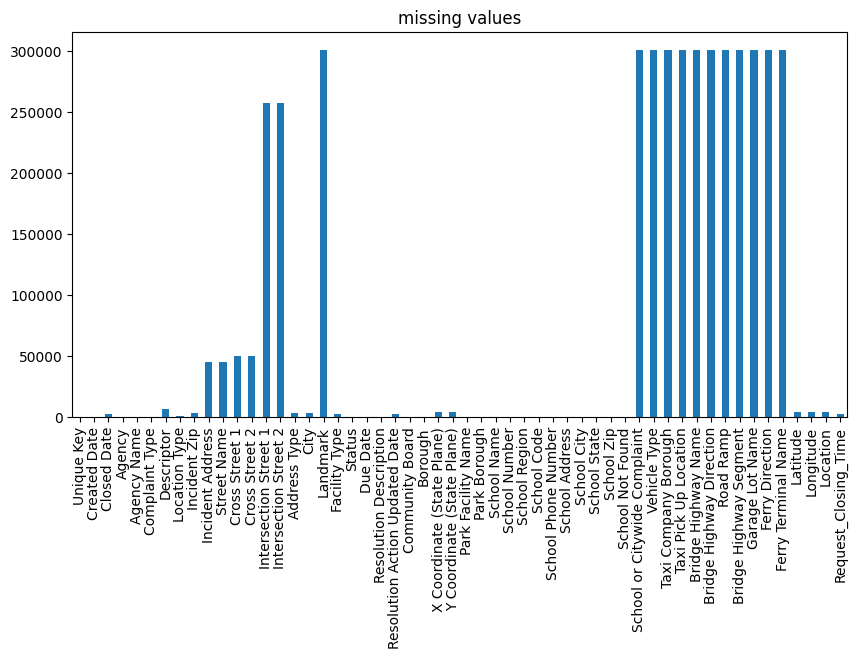

In [15]:
#To visualize number of null values in dataset by plotting bar chart we can see which column has what num of null values
data.isnull().sum().plot(kind='bar', figsize=(10,5), title = 'missing values')

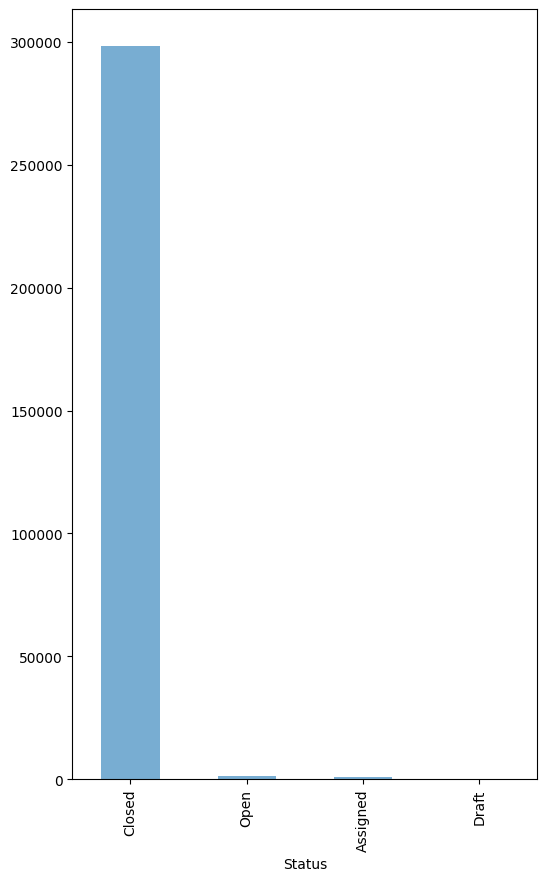

In [17]:
data['Status'].value_counts().plot(kind='bar', alpha=0.6, figsize=(6,10))
plt.show()

# Task 2: Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ 
#as the time elapsed between request creation and request closing.

In [18]:
data["Created Date"]=pd.to_datetime(data['Created Date'])
data["Closed Date"]=pd.to_datetime(data['Closed Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300697 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300697 non-null  int64          
 1   Created Date                    300697 non-null  datetime64[ns] 
 2   Closed Date                     298533 non-null  datetime64[ns] 
 3   Agency                          300697 non-null  object         
 4   Agency Name                     300697 non-null  object         
 5   Complaint Type                  300697 non-null  object         
 6   Descriptor                      294783 non-null  object         
 7   Location Type                   300566 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-null  

In [20]:
data['Request_closing_time']=data["Closed Date"]-data["Created Date"]

In [21]:
data['Request_closing_time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300693               NaT
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_closing_time, Length: 300697, dtype: timedelta64[ns]

In [29]:
data['Request_Closing_Time_mins'] = data['Request_closing_time']/np.timedelta64(1,'m')

In [30]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_closing_time,Request_closing_time_mins,Request_Closing_Time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0 days 00:55:15,55.250000,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,0 days 01:26:16,86.266667,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,0 days 04:51:31,291.516667,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,0 days 07:45:14,465.233333,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,0 days 03:27:02,207.033333,207.033333


In [31]:
# Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining.

In [32]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee'], dtype=object)

In [33]:
# Conclusion 1: City with maximum number of complaints was found to be Brooklyn with different types of complaints
df1=data.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'Number of complaints vs. City')

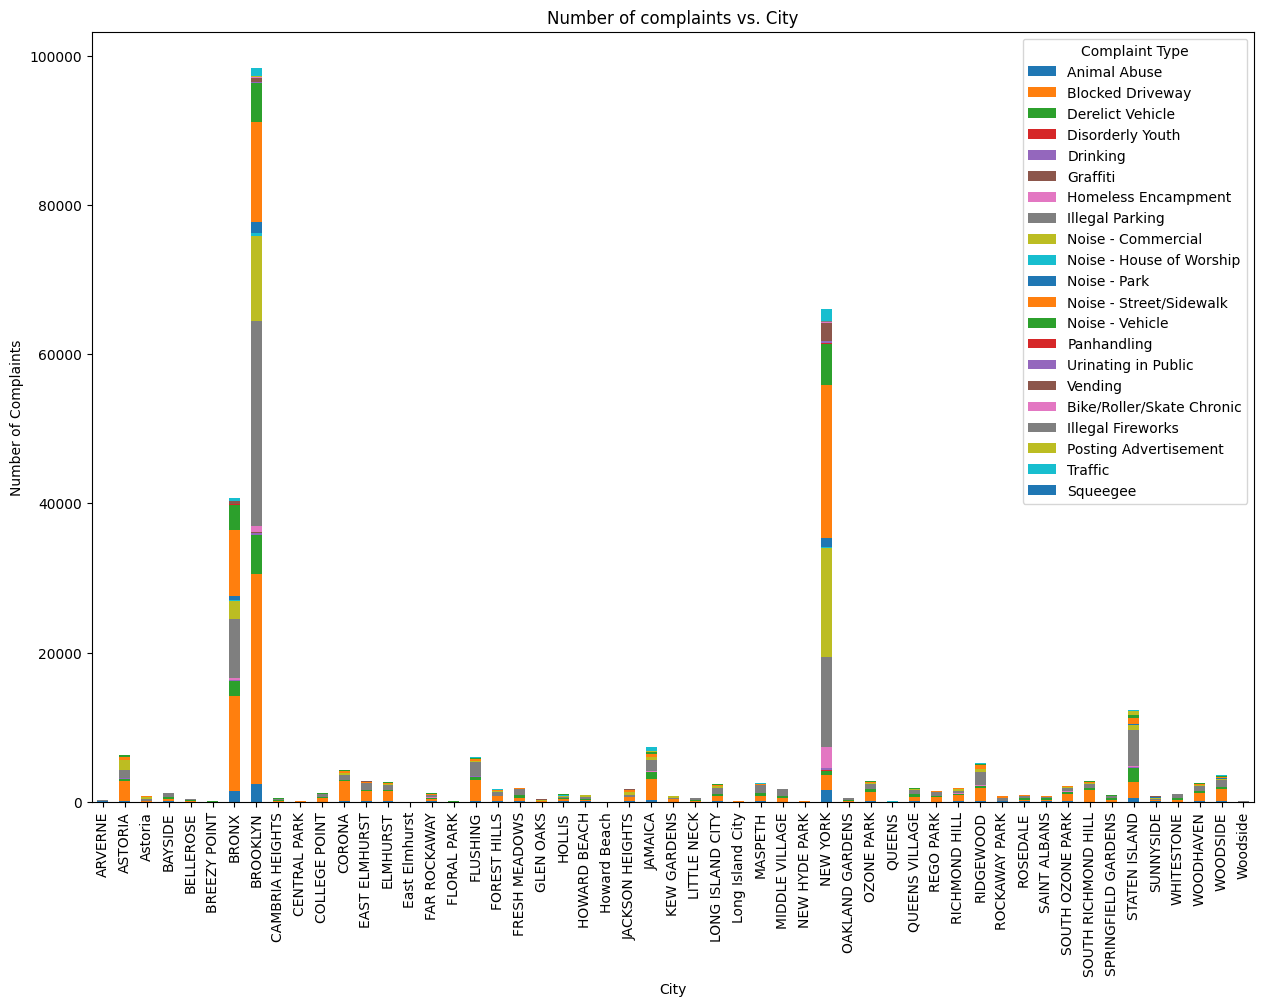

In [34]:
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

In [35]:
data.Status.unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

In [36]:
df2=data.groupby(['City','Status']).size().unstack().fillna(0)

In [37]:
# Conclusion 2: Based upon the status of complaints it can be inferred that maximum number of complaints were resolved.
# From the total unresolved cases the top 5 cities have been found which sum upto 76.92 % of total Open cases
df2.sort_values(by='Open', ascending=False).head() # Thus maximum pending cases are in New york

Status,Assigned,Closed,Draft,Open
City,,,,
NEW YORK,15.0,65961.0,0.0,18.0
BROOKLYN,19.0,98275.0,1.0,12.0
JAMAICA,1.0,7286.0,0.0,9.0
STATEN ISLAND,2.0,12335.0,0.0,6.0
BRONX,6.0,40690.0,1.0,5.0


In [38]:
df2['Unresolved_percentage']= df2['Open']/df2['Open'].sum()*100

In [39]:
df2.sort_values(by='Unresolved_percentage', ascending=False).head().sum()

Status
Assigned                     43.000000
Closed                   224547.000000
Draft                         2.000000
Open                         50.000000
Unresolved_percentage        76.923077
dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_4104\2188013915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_3= sns.countplot(x=data.loc[data.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
C:\Users\admin\AppData\Local\Temp\ipykernel_4104\2188013915.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90)


[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

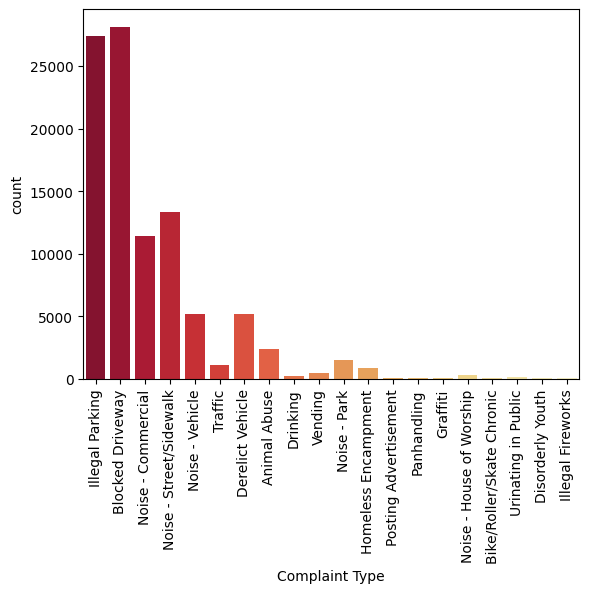

In [40]:
# Conclusion 3: Since maximum number of complaints were filed in Brooklyn, complaint data was analysed for this city.
# Blocked Driveway was found to be the most frequent complaint lodged to NYPD in the city of Brooklyn.
data.loc[(data['City']=='BROOKLYN'),:]['Complaint Type'].value_counts()
plot_3= sns.countplot(x=data.loc[data.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90)

<Axes: xlabel='Agency Name'>

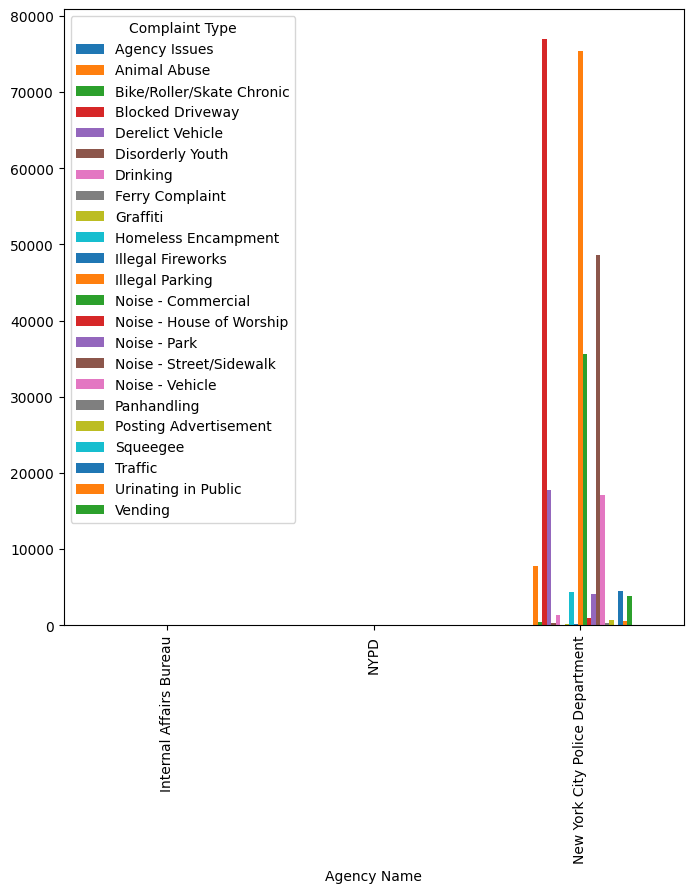

In [41]:
# Conclusion 4: It was found that al the complaints were lodged to New York Police Department
df3=data.groupby(['Agency Name','Complaint Type']).size().unstack().head(50)
df3.plot.bar(figsize=(8,8))

In [42]:
data['Location Type'].value_counts()

Location Type
Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Name: count, dtype: int64

In [43]:
# Conclusion 5: The maximum complaints were regarding Street and Sidwalk which indicate that 
# there is a scope for improvement in strict measures on the road thus Traffic police can look into this matter
data['Location Type'].fillna(value='Street/Sidewalk',inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4104\2423360359.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_4.set_xticklabels(plot_4.get_xticklabels(), rotation=90)


[Text(0.0, 0, '0'),
 Text(50000.0, 0, '50000'),
 Text(100000.0, 0, '100000'),
 Text(150000.0, 0, '150000'),
 Text(200000.0, 0, '200000'),
 Text(250000.0, 0, '250000'),
 Text(300000.0, 0, '300000')]

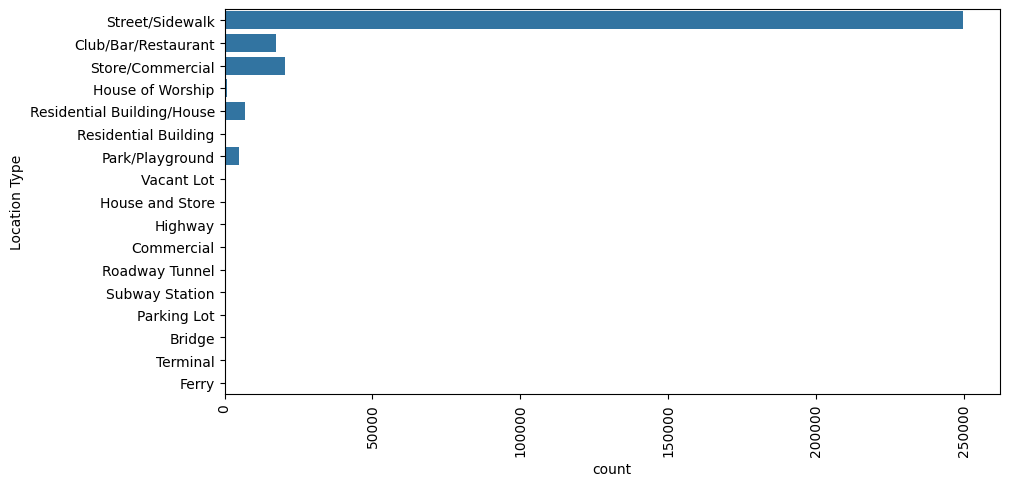

In [44]:
plt.figure(figsize=(10,5))
plot_4 =sns.countplot(data['Location Type'])
plot_4.set_xticklabels(plot_4.get_xticklabels(), rotation=90)

In [45]:
# Conclusion 6: Major Complaint types and their count
df4= data['Complaint Type'].value_counts().head(10)
df4.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object', name='Complaint Type')

In [46]:
df4

Complaint Type
Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_4104\620086055.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_5.set_xticklabels(plot_5.get_xticklabels(), rotation=90)


[Text(0, 0, 'Blocked Driveway'),
 Text(1, 0, 'Illegal Parking'),
 Text(2, 0, 'Noise - Street/Sidewalk'),
 Text(3, 0, 'Noise - Commercial'),
 Text(4, 0, 'Derelict Vehicle')]

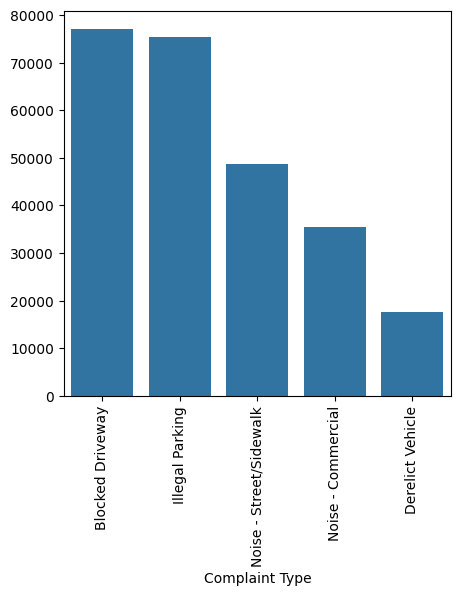

In [47]:
plt.figure(figsize=(5,5))
plot_5= sns.barplot(x=df4.nlargest().index, y= df4.nlargest().values)
plot_5.set_xticklabels(plot_5.get_xticklabels(), rotation=90)

In [48]:
data.Request_Closing_Time_mins.head()

0     55.250000
1     86.266667
2    291.516667
3    465.233333
4    207.033333
Name: Request_Closing_Time_mins, dtype: float64

Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

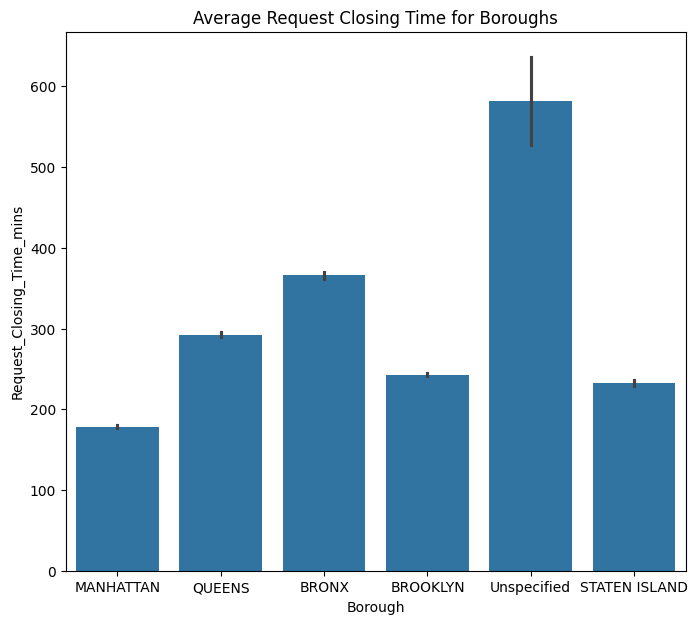

In [49]:
# Conclusion 7: Average resolving time of a compalaint was observed for different Boroughs
plt.figure(figsize=(8,7))
sns.barplot(x='Borough', y='Request_Closing_Time_mins', data=data)
plt.title('Average Request Closing Time for Boroughs')

In [50]:
# Conclusion 7: Average Request Closing Time for various Compaints
df7=data[['Complaint Type', 'Request_Closing_Time_mins']]
df8=df7.groupby('Complaint Type')['Request_Closing_Time_mins'].mean().fillna(0).to_frame()

In [51]:
df8.head()

,Request_Closing_Time_mins
Complaint Type,
Agency Issues,315.619444
Animal Abuse,312.794630
Bike/Roller/Skate Chronic,225.987736
Blocked Driveway,284.454311
Derelict Vehicle,441.848379


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Ferry Complaint'),
  Text(1, 0, 'Posting Advertisement'),
  Text(2, 0, 'Illegal Fireworks'),
  Text(3, 0, 'Noise - Commercial'),
  Text(4, 0, 'Noise - House of Worship'),
  Text(5, 0, 'Noise - Park'),
  Text(6, 0, 'Noise - Street/Sidewalk'),
  Text(7, 0, 'Traffic'),
  Text(8, 0, 'Disorderly Youth'),
  Text(9, 0, 'Noise - Vehicle'),
  Text(10, 0, 'Urinating in Public'),
  Text(11, 0, 'Bike/Roller/Skate Chronic'),
  Text(12, 0, 'Drinking'),
  Text(13, 0, 'Vending'),
  Text(14, 0, 'Squeegee'),
  Text(15, 0, 'Homeless Encampment'),
  Text(16, 0, 'Panhandling'),
  Text(17, 0, 'Illegal Parking'),
  Text(18, 0, 'Blocked Driveway'),
  Text(19, 0, 'Animal Abuse'),
  Text(20, 0, 'Agency Issues'),
  Text(21, 0, 'Graffiti'),
  Text(22, 0, 'Derelict Vehicle')])

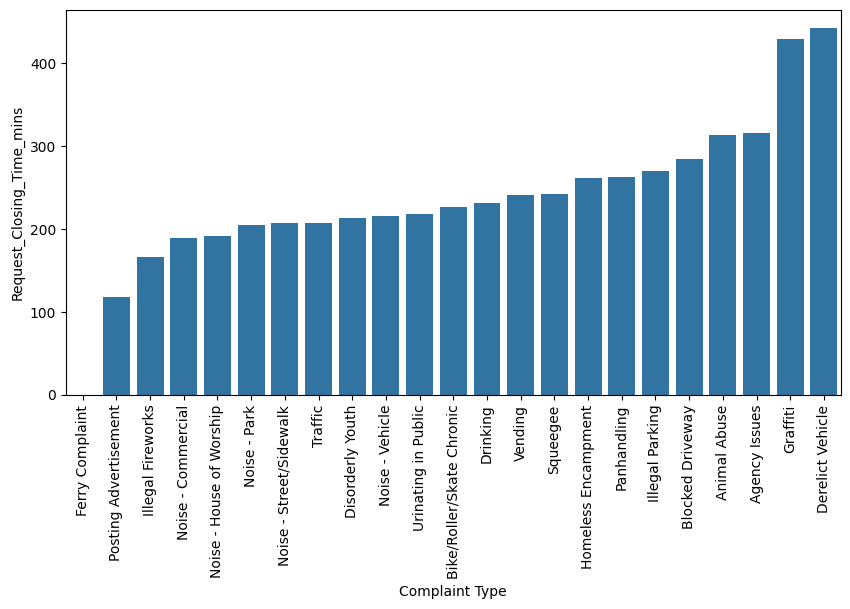

In [52]:
df8['Complaint Type']=df8.index
plt.figure(figsize=(10,5))
sns.barplot(x='Complaint Type', y='Request_Closing_Time_mins', data=df8.sort_values('Request_Closing_Time_mins'))
plt.xticks(rotation=90)

In [53]:
# Task 3: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [54]:
df9 = data.groupby(['City','Complaint Type'])['Request_Closing_Time_mins'].mean()
df9.unstack().fillna(0).head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Traffic,Squeegee
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,129.217544,151.558095,178.093210,215.475000,14.316667,92.000000,108.887500,138.981897,137.233333,93.731818,...,119.543678,111.592857,62.0,41.516667,29.000,0.000000,0.000000,0.0,0.000000,0.0
ASTORIA,300.010133,288.967068,581.354986,174.155556,283.345238,845.704167,295.055208,290.003464,187.981748,121.333333,...,207.069819,210.550572,69.0,277.542593,296.125,104.358889,166.408333,352.2,324.610993,0.0
Astoria,0.000000,294.877730,374.169444,0.000000,0.000000,0.000000,0.000000,282.677387,212.513410,0.000000,...,222.793860,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.0
BAYSIDE,196.470721,153.784306,201.586785,178.383333,114.000000,273.094444,172.533333,153.760019,134.020000,212.091667,...,91.860000,102.505208,0.0,0.000000,112.675,0.000000,0.000000,0.0,91.616667,0.0
BELLEROSE,763.480952,605.964737,1030.088577,111.000000,235.083333,0.000000,2348.000000,492.187579,404.446396,131.816667,...,544.093590,154.990000,449.0,452.483333,0.000,294.000000,400.000000,135.6,345.530952,0.0


In [55]:
# Task 5: Perform a statistical test for the following:
# Please note: For the below statements you need to state the Null 
# and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
# Whether the average response time across complaint types is similar or not (overall)
# Are the type of complaint or service requested and location related?

In [56]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee'], dtype=object)

<Axes: >

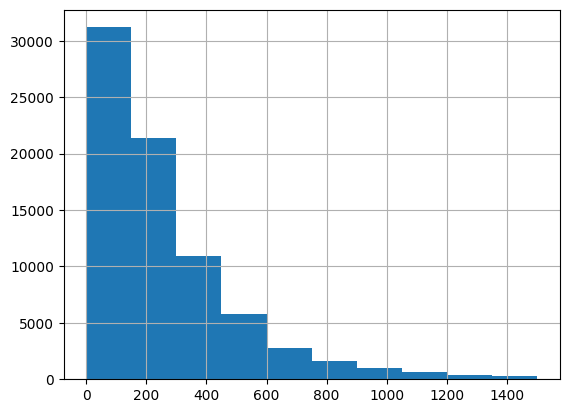

In [57]:
# Since Blocked Driveway is the most frequent complaint I shall analyze that data
df10= data[data['Complaint Type']== 'Blocked Driveway']['Request_Closing_Time_mins']
df10.hist(range=(0,1500)) 
# The data is left skewed, needs to be converted to gaussian

<Axes: >

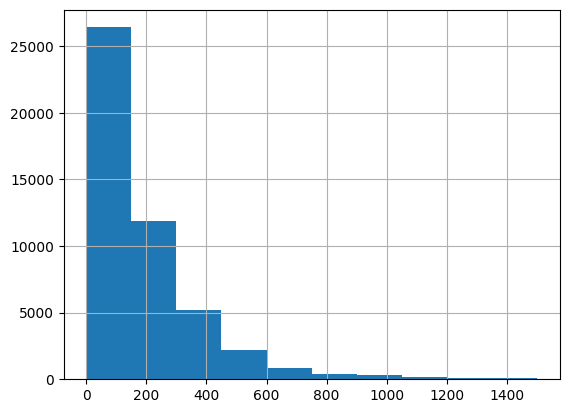

In [58]:
df11= data[data['Complaint Type']== 'Noise - Street/Sidewalk']['Request_Closing_Time_mins']
df11.hist(range=(0,1500)) # Simiar result

In [59]:
# Applying log transformation
dataset={}
for i in data['Complaint Type'].unique():
    dataset[i]= np.log(data[data['Complaint Type']==i]['Request_Closing_Time_mins'])


In [60]:
dataset.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint', 'Agency Issues', 'Squeegee'])

<Axes: >

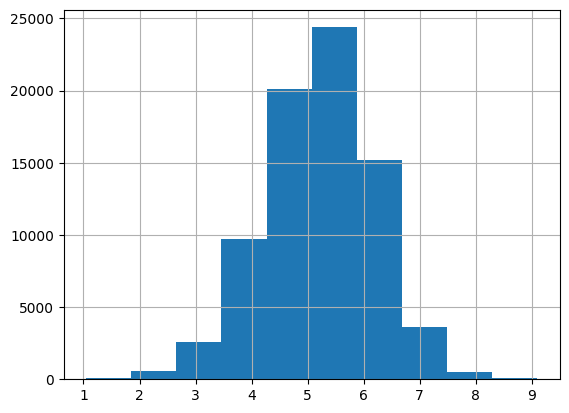

In [61]:
dataset['Blocked Driveway'].hist()

In [62]:
# ANOVA Analysis (Checking for top 5 complaints)
#1. Null Hypothesis: The average response time across complaint types is not different
# Alternate Hypothesis: The average response time across complaint types is different

In [63]:
from scipy.stats import f_oneway
stat,p = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'], 
                dataset['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


In [64]:
# 2.Are the type of complaint or service requested and location related?

In [75]:
df11= data[['Complaint Type','Location','Latitude','Longitude','City','Borough']]

In [76]:
df11.head()

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,NEW YORK,MANHATTAN
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,ASTORIA,QUEENS
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,BRONX,BRONX
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,BRONX,BRONX
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,ELMHURST,QUEENS


In [77]:
df11['Complaint Type']=df11['Complaint Type'].astype('category').cat.codes
df11['City']= df11['City'].astype('category').cat.codes
df11['Borough']= df11['Borough'].astype('category').cat.codes

C:\Users\admin\AppData\Local\Temp\ipykernel_4104\610953085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Complaint Type']=df11['Complaint Type'].astype('category').cat.codes
C:\Users\admin\AppData\Local\Temp\ipykernel_4104\610953085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['City']= df11['City'].astype('category').cat.codes
C:\Users\admin\AppData\Local\Temp\ipykernel_4104\610953085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [69]:
df11.head()

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,15,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,33,2
1,3,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,1,3
2,3,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,6,0
3,11,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,6,0
4,11,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,13,3


In [80]:
#df11.corr(method='pearson') 
# From the first line it can be seen that the complaint types does not depend upon the location

In [84]:
corr_test_data = df11[['Complaint Type','Borough','Longitude','Latitude','City']]

In [86]:
corr_test_data.corr()

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.058457,-0.185947,0.151318,0.092497
Borough,-0.058457,1.000000,0.021277,-0.249501,0.654636
Longitude,-0.185947,0.021277,1.000000,0.364966,-0.123933
Latitude,0.151318,-0.249501,0.364966,1.000000,-0.000571
City,0.092497,0.654636,-0.123933,-0.000571,1.000000


In [87]:
import seaborn as sns

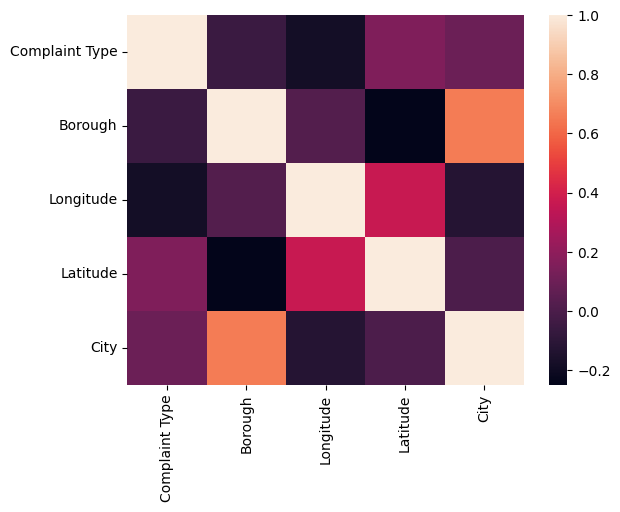

In [88]:
ax = sns.heatmap(corr_test_data.corr())

Data Analysis By SUJATA KINHEKAR